In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

ruta_limpia = '../data/MX_videos_limpio.csv'
df = pd.read_csv(ruta_limpia)

print("Dataset listo para crear el modelo lineal.")

Dataset listo para crear el modelo lineal.


Matriz de Correlación:
          views     likes
views  1.000000  0.798751
likes  0.798751  1.000000


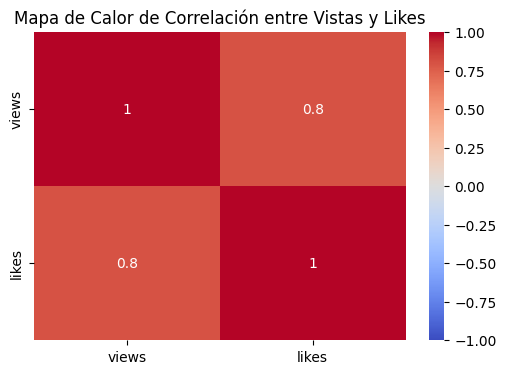

In [3]:
correlation_matrix = df[['views', 'likes']].corr()

print("Matriz de Correlación:")
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Vistas y Likes')
plt.show()

In [4]:
X = df[['views']] 
y = df['likes']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos divididos: {len(X_train)} para entrenamiento, {len(X_test)} para prueba.")

Datos divididos: 32360 para entrenamiento, 8091 para prueba.


In [5]:
model = LinearRegression()

model.fit(X_train, y_train)

print(f"El modelo ha sido entrenado.")
print(f"Coeficiente (pendiente, m): {model.coef_[0]:.4f}")
print(f"Intercepto (ordenada al origen, b): {model.intercept_:.2f}")
print("\nLa ecuación del modelo es: likes = {:.4f} * views + {:.2f}".format(model.coef_[0], model.intercept_))

El modelo ha sido entrenado.
Coeficiente (pendiente, m): 0.0384
Intercepto (ordenada al origen, b): 2750.56

La ecuación del modelo es: likes = 0.0384 * views + 2750.56


In [6]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"Evaluación del Modelo en el conjunto de prueba:")
print(f"R² Score: {r2:.4f}")


print(f"\nInterpretación: El {r2:.2%} de la variabilidad en el número de 'likes' puede ser explicada por el número de 'views' según nuestro modelo.")

Evaluación del Modelo en el conjunto de prueba:
R² Score: 0.6615

Interpretación: El 66.15% de la variabilidad en el número de 'likes' puede ser explicada por el número de 'views' según nuestro modelo.


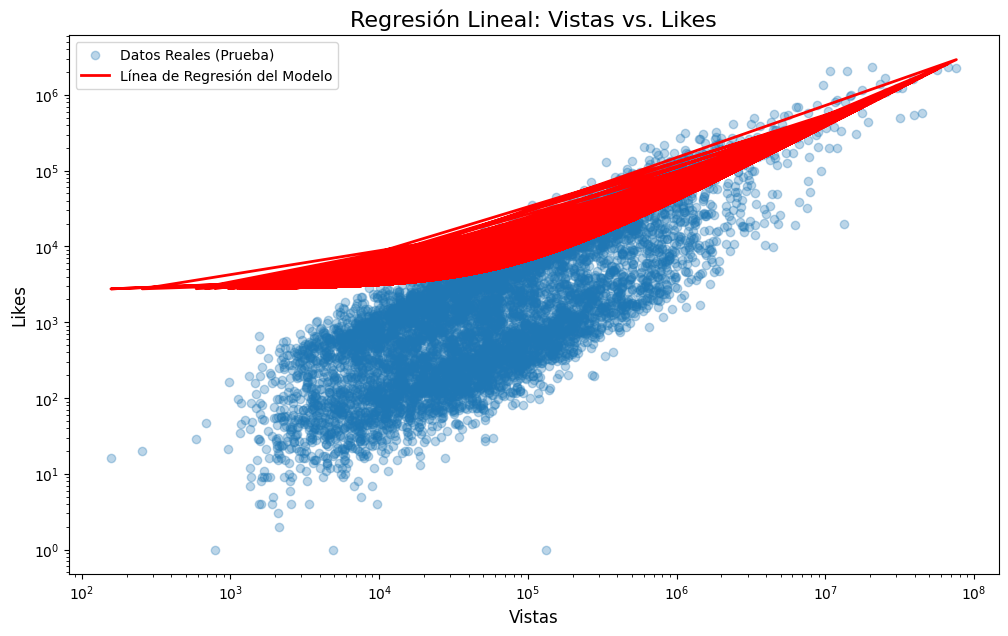

In [7]:
plt.figure(figsize=(12, 7))

plt.scatter(X_test, y_test, alpha=0.3, label='Datos Reales (Prueba)')

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión del Modelo')

plt.title('Regresión Lineal: Vistas vs. Likes', fontsize=16)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()